In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [7]:
ticker = ['PG']
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2007-1-1')['Adj Close']

In [8]:
log_returns = np.log(1 + data.pct_change())

In [9]:
log_returns.tail()

,PG
Date,
2021-05-28,-0.000963
2021-06-01,-0.014717
2021-06-02,0.004355
2021-06-03,0.017750
2021-06-04,0.000736


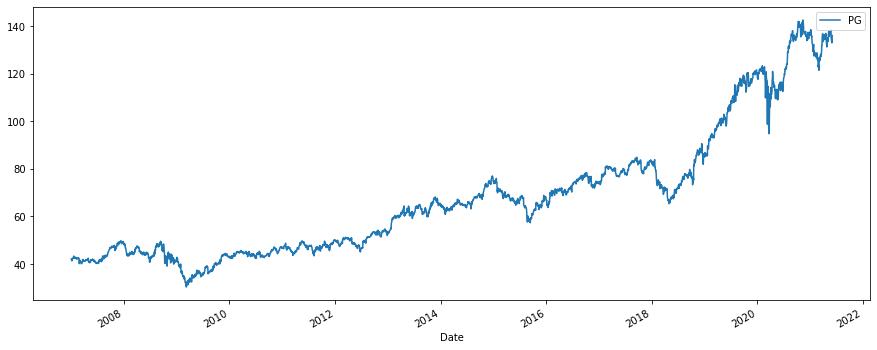

In [10]:
data.plot(figsize = (15,6))

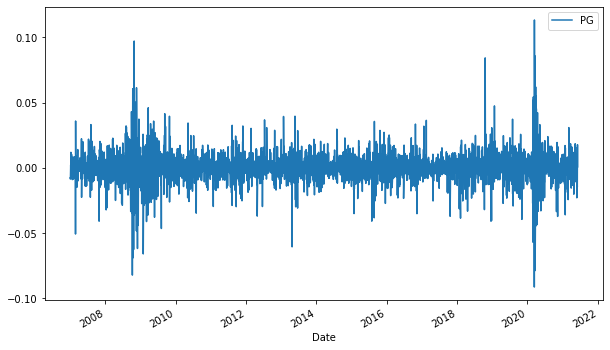

In [11]:
log_returns.plot(figsize = (10,6))

In [12]:
u = log_returns.mean()
u

PG    0.000323
dtype: float64

In [13]:
var = log_returns.var()
var

PG    0.00014
dtype: float64

In [14]:
drift = u - (0.5 * var)
drift

PG    0.000253
dtype: float64

In [15]:
stdev = log_returns.std()
stdev

PG    0.011836
dtype: float64

In [16]:
type(drift)

pandas.core.series.Series

In [17]:
type(stdev)

pandas.core.series.Series

In [18]:
np.array(drift)

array([0.00025282])

In [19]:
drift.values

array([0.00025282])

In [20]:
stdev.values

array([0.01183576])

In [21]:
norm.ppf(0.95)

1.6448536269514722

In [22]:
x = np.random.rand(10,2)
x

array([[0.41756337, 0.780435  ],
       [0.45984736, 0.86783055],
       [0.33597312, 0.77388951],
       [0.48612445, 0.3272494 ],
       [0.83053077, 0.29667746],
       [0.94067996, 0.12989997],
       [0.92993255, 0.83804615],
       [0.15433135, 0.08733376],
       [0.70507421, 0.44228278],
       [0.84570838, 0.18134997]])

In [23]:
norm.ppf(x)

array([[-0.20813093,  0.77366319],
       [-0.10081828,  1.11619446],
       [-0.42347842,  0.75171749],
       [-0.03478786, -0.44752118],
       [ 0.95626482, -0.53398064],
       [ 1.56050717, -1.12686413],
       [ 1.47528887,  0.98645946],
       [-1.01803208, -1.35735791],
       [ 0.53905112, -0.14518404],
       [ 1.01819932, -0.91023246]])

In [24]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.05848571,  1.09859971],
       [ 0.22586909,  1.63612925],
       [ 1.00460886,  1.32369822],
       [ 0.31875968,  0.52354819],
       [-1.14333257, -2.43831606],
       [-1.8207332 ,  0.32169233],
       [ 0.39782945,  0.36166329],
       [ 1.26761665, -0.55390769],
       [-1.21449353, -1.05365071],
       [ 1.14456834,  1.77254106]])

In [25]:
t_intervals = 1000
iterations = 10

In [26]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00091765, 0.99919954, 0.99442217, ..., 1.02718982, 0.97328178,
        0.99854466],
       [0.99791377, 1.01163108, 0.99321169, ..., 0.98869126, 0.99934272,
        1.02007426],
       [0.99666966, 0.99865376, 1.01306773, ..., 0.98859878, 0.99596682,
        0.99720126],
       ...,
       [1.01151032, 1.01251567, 1.0062671 , ..., 1.00549612, 0.99933206,
        0.99539967],
       [0.986226  , 0.99954511, 1.00891666, ..., 0.99088459, 1.00388011,
        1.00099619],
       [1.00966201, 0.97861213, 0.99713963, ..., 1.00648357, 0.9949582 ,
        1.00623417]])

In [27]:
S0 = data.iloc[-1]
S0

PG    135.949997
Name: 2021-06-04 00:00:00, dtype: float64

In [28]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
price_list[0] = S0
price_list

array([[135.94999695, 135.94999695, 135.94999695, ..., 135.94999695,
        135.94999695, 135.94999695],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [30]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [31]:
price_list

array([[135.94999695, 135.94999695, 135.94999695, ..., 135.94999695,
        135.94999695, 135.94999695],
       [135.6663741 , 137.53124259, 135.02712562, ..., 134.41257361,
        135.86063918, 138.67909198],
       [135.21455937, 137.34609197, 136.791624  , ..., 132.88010665,
        135.31268866, 138.29096486],
       ...,
       [101.17631719, 156.49991174, 261.23254634, ..., 133.6621118 ,
        131.5881297 , 218.2213738 ],
       [ 99.78271424, 156.4287218 , 263.56186943, ..., 132.44372724,
        132.09870637, 218.43876312],
       [100.74681601, 153.08304487, 262.80798591, ..., 133.30243569,
        131.43269053, 219.80054674]])

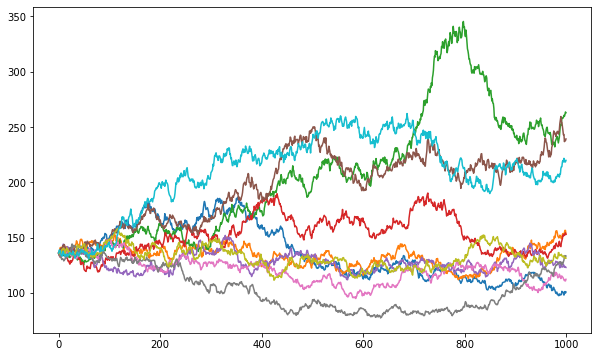

In [32]:
plt.figure(figsize=(10,6))
plt.plot(price_list)